In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
# CSV - modified to rename columns
data = pd.read_csv('resources/data_modified.csv')

# Remove un-needed columns
data = data.drop(columns=['player','win','me','2','3','4','5','6','7','8','9','10','11','12',\
                          'production','tradeGain','robberCardsGain','totalGain','tradeLoss',\
                          'robberCardsLoss','tribute','totalLoss','totalAvailable',"1_1_N",	"1_2_N",	"1_3_N",	"2_1_N",	"2_2_N",	"2_3_N"
])

# Pandas dummies convert to categorical
data = pd.get_dummies(data)

# Create list of column names
columns = []
for ea in data.columns:
    columns.append(ea)
# Pop 0th
columns.pop(0)

'gameNum'

In [9]:
data

,gameNum,points,1_1_P,1_2_P,1_3_P,2_1_P,2_2_P,2_3_P,1_1_R_C,1_1_R_L,...,2_3_R_2S,2_3_R_2W,2_3_R_3G,2_3_R_B,2_3_R_C,2_3_R_D,2_3_R_L,2_3_R_O,2_3_R_S,2_3_R_W
0,1,5,5,2,2,4,3,2,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,9,4,5,3,3,4,2,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,10,4,5,1,5,3,2,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,5,5,4,2,3,5,3,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2,10,5,4,3,5,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,49,5,5,3,2,3,4,2,0,0,...,0,0,0,0,0,0,0,0,1,0
196,50,5,5,4,3,4,5,2,0,0,...,0,0,0,0,1,0,0,0,0,0
197,50,10,5,3,2,3,4,2,0,1,...,0,0,0,0,1,0,0,0,0,0
198,50,4,4,5,3,4,4,1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
#KNN
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [11]:
# Assign X (data) and y (target)
X = data[columns]
y = data['points'].values.reshape(-1,1)
print(X.shape, y.shape)

(200, 51) (200, 1)


In [12]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [13]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [14]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [15]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression()

<ipython-input-16-3c198b7d36c9>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train_scaled, y_train)
<ipython-input-16-3c198b7d36c9>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train_scaled, y_train)
<ipython-input-16-3c198b7d36c9>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train_scaled, y_train)
<ipython-input-16-3c198b7d36c9>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train_scaled, y_train)
<ipython-input-16-3c198b7d36c9>:5: DataConversionWarning: A column-vector y was passed when a 1d

k: 1, Train/Test Score: 1.000/0.100
k: 3, Train/Test Score: 0.460/0.200
k: 5, Train/Test Score: 0.453/0.280
k: 7, Train/Test Score: 0.447/0.160
k: 9, Train/Test Score: 0.373/0.240
k: 11, Train/Test Score: 0.420/0.320
k: 13, Train/Test Score: 0.400/0.400
k: 15, Train/Test Score: 0.380/0.320
k: 17, Train/Test Score: 0.427/0.340
k: 19, Train/Test Score: 0.373/0.380
k: 21, Train/Test Score: 0.380/0.360
k: 23, Train/Test Score: 0.340/0.340
k: 25, Train/Test Score: 0.360/0.380
k: 27, Train/Test Score: 0.347/0.320
k: 29, Train/Test Score: 0.387/0.280
k: 31, Train/Test Score: 0.393/0.360
k: 33, Train/Test Score: 0.373/0.280
k: 35, Train/Test Score: 0.387/0.320
k: 37, Train/Test Score: 0.373/0.280
k: 39, Train/Test Score: 0.367/0.300


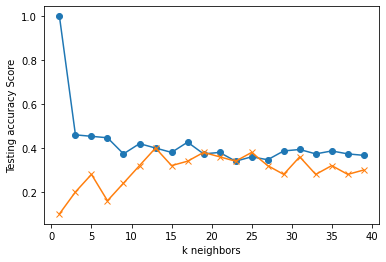

In [16]:
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [91]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression()

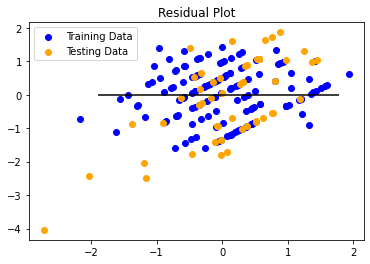

In [92]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [68]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.5826730861034712, R2: -0.8419761265579457


In [69]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.2591632387858958, R2: -0.46546285878482974


In [70]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.2591632387858958, R2: -0.46546285878482974


In [71]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.303528110867412, R2: -0.5170964121379997


In [35]:
########################
# GridSearch Estimator #
########################

In [36]:
data

,win,1_1_N,1_2_N,1_3_N,2_1_N,2_2_N,2_3_N,1_1_R_C,1_1_R_L,1_1_R_O,...,2_3_R_2S,2_3_R_2W,2_3_R_3G,2_3_R_B,2_3_R_C,2_3_R_D,2_3_R_L,2_3_R_O,2_3_R_S,2_3_R_W
0,0,6,3,11,9,10,11,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,5,8,10,4,5,11,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,5,6,12,8,4,3,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,6,9,3,4,8,10,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1,6,9,10,8,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,8,4,3,4,5,11,0,0,0,...,0,0,0,0,0,0,0,0,1,0
196,0,6,9,10,5,6,11,0,0,1,...,0,0,0,0,1,0,0,0,0,0
197,1,8,4,3,4,9,11,0,1,0,...,0,0,0,0,1,0,0,0,0,0
198,0,5,8,10,5,9,2,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
data[]